In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Only including players taken in round 7 or earlier for consitincey as players taken after round 7 today would be considered undrafted players

In [184]:
df = pd.read_csv("./data_sets/nfl_draft.csv")
df = df[df['rnd'] <= 7]

Very few players specified as either S or CB changing to DB for more consitency

In [185]:
df['pos'] = df['pos'].replace(['S', 'CB'], "DB")
df['prem'] = df['pos'].isin(['QB', 'DE', "T", "WR", "DB"])
df['career_length'] = (df['g'] >= 45).astype(int)
df['restav'] = df['carav'] - df['first4av']

In [202]:
rb_df = df[df['pos'] == "RB"]
before_df = rb_df[rb_df['year'] < 2000]
after_df = rb_df[rb_df['year'] >= 2000]
other_df = df[df['pos'] != "RB"]

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7291 entries, 0 to 8294
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   column_a           7291 non-null   object 
 1   player_id          6620 non-null   object 
 2   year               7291 non-null   int64  
 3   rnd                7291 non-null   int64  
 4   pick               7291 non-null   int64  
 5   tm                 7291 non-null   object 
 6   player             7291 non-null   object 
 7   hof                7291 non-null   object 
 8   pos                7291 non-null   object 
 9   position_standard  7291 non-null   object 
 10  first4av           7291 non-null   int64  
 11  age                6599 non-null   float64
 12  to                 6462 non-null   float64
 13  ap1                7291 non-null   int64  
 14  pb                 7291 non-null   int64  
 15  st                 7291 non-null   int64  
 16  carav              6462 non-n

In [188]:
df.shape

(7291, 37)

In [189]:
df.columns

Index(['column_a', 'player_id', 'year', 'rnd', 'pick', 'tm', 'player', 'hof',
       'pos', 'position_standard', 'first4av', 'age', 'to', 'ap1', 'pb', 'st',
       'carav', 'drav', 'g', 'cmp', 'pass_att', 'pass_yds', 'pass_td',
       'pass_int', 'rush_att', 'rush_yds', 'rush_tds', 'rec', 'rec_yds',
       'rec_tds', 'tkl', 'def_int', 'sk', 'college_univ', 'prem',
       'career_length', 'restav'],
      dtype='object')

In [190]:
df.dtypes

column_a              object
player_id             object
year                   int64
rnd                    int64
pick                   int64
tm                    object
player                object
hof                   object
pos                   object
position_standard     object
first4av               int64
age                  float64
to                   float64
ap1                    int64
pb                     int64
st                     int64
carav                float64
drav                 float64
g                    float64
cmp                  float64
pass_att             float64
pass_yds             float64
pass_td              float64
pass_int             float64
rush_att             float64
rush_yds             float64
rush_tds             float64
rec                  float64
rec_yds              float64
rec_tds              float64
tkl                  float64
def_int              float64
sk                    object
college_univ          object
prem          

In [191]:
df.isna().sum()

column_a                0
player_id             671
year                    0
rnd                     0
pick                    0
tm                      0
player                  0
hof                     0
pos                     0
position_standard       0
first4av                0
age                   692
to                    829
ap1                     0
pb                      0
st                      0
carav                 829
drav                 1433
g                     862
cmp                  6729
pass_att             6729
pass_yds             6729
pass_td              6729
pass_int             6729
rush_att             5774
rush_yds             5774
rush_tds             5774
rec                  5292
rec_yds              5292
rec_tds              5292
tkl                  3273
def_int              5795
sk                   4359
college_univ         2286
prem                    0
career_length           0
restav                829
dtype: int64

In [192]:
df.describe()

,year,rnd,pick,first4av,age,to,ap1,pb,st,carav,...,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int,career_length,restav
count,7291.000000,7291.000000,7291.000000,7291.000000,6599.000000,6462.000000,7291.000000,7291.000000,7291.00000,6462.000000,...,1517.000000,1517.000000,1517.000000,1999.000000,1999.000000,1999.000000,4018.000000,1496.000000,7291.000000,6462.000000
mean,2000.859279,4.169524,119.621040,11.006446,22.634339,2005.740328,0.084076,0.310931,2.01207,17.937326,...,210.992749,866.145023,6.048780,110.673837,1304.537769,7.798899,88.581384,9.401070,0.485256,5.518880
std,8.733154,2.016410,70.327256,13.554345,0.852457,8.500829,0.498759,1.176246,3.06377,22.721491,...,465.381988,1968.055632,14.303864,174.587624,2292.190801,15.520743,150.741197,16.112115,0.499817,12.028646
min,1985.000000,1.000000,1.000000,-4.000000,20.000000,1985.000000,0.000000,0.000000,0.00000,-4.000000,...,0.000000,-36.000000,0.000000,0.000000,-19.000000,0.000000,1.000000,0.500000,0.000000,-7.000000
25%,1994.000000,2.000000,59.000000,0.000000,22.000000,1999.000000,0.000000,0.000000,0.00000,2.000000,...,3.000000,11.000000,0.000000,5.000000,45.000000,0.000000,4.000000,1.000000,0.000000,0.000000
50%,2001.000000,4.000000,118.000000,5.000000,23.000000,2007.000000,0.000000,0.000000,0.00000,8.000000,...,22.000000,98.000000,0.000000,37.000000,351.000000,2.000000,17.000000,4.000000,0.000000,0.000000
75%,2008.000000,6.000000,177.000000,18.000000,23.000000,2014.000000,0.000000,0.000000,3.00000,27.000000,...,194.000000,704.000000,5.000000,145.500000,1477.500000,8.000000,105.000000,10.625000,1.000000,5.000000
max,2015.000000,7.000000,262.000000,88.000000,29.000000,2016.000000,10.000000,14.000000,19.00000,177.000000,...,4409.000000,18355.000000,164.000000,1549.000000,22895.000000,197.000000,1562.000000,200.000000,1.000000,109.000000


c:\Users\Intern\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


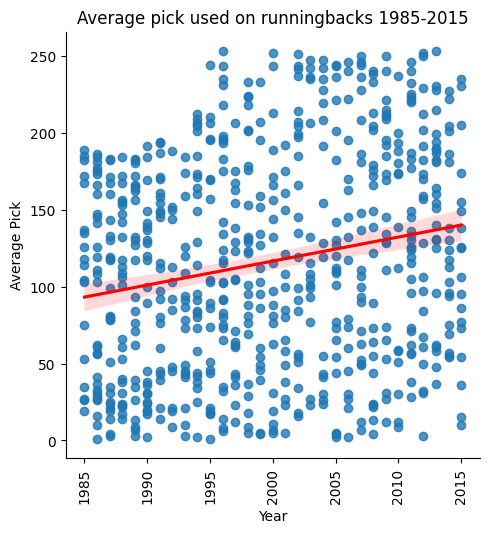

In [219]:
sns.lmplot(data=rb_df, x='year', y="pick", line_kws={'color': 'red'})
plt.xlabel("Year")
plt.ylabel("Average Pick")
plt.xticks(rotation='vertical')
plt.title(f"Average pick used on runningbacks 1985-2015")
plt.show()



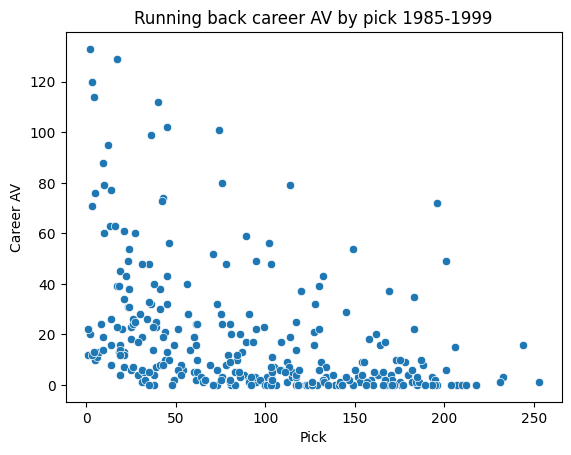

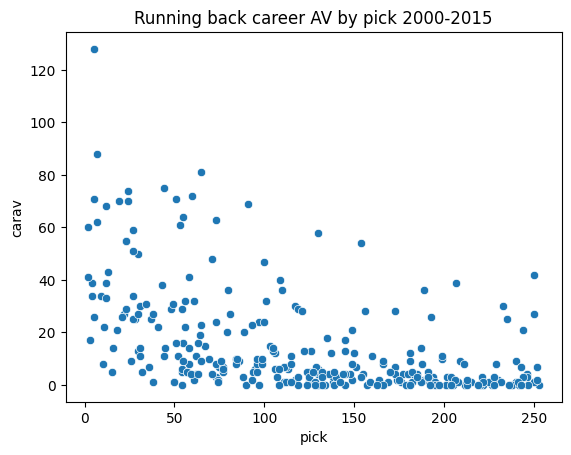

In [210]:
sns.scatterplot(before_df, x="pick", y="carav")

plt.xlabel("Pick")
plt.ylabel("Career AV")
plt.title(f"Running back career AV by pick 1985-1999")
plt.show()
sns.scatterplot(after_df, x="pick", y="carav")
plt.title(f"Running back career AV by pick 2000-2015")
plt.show()

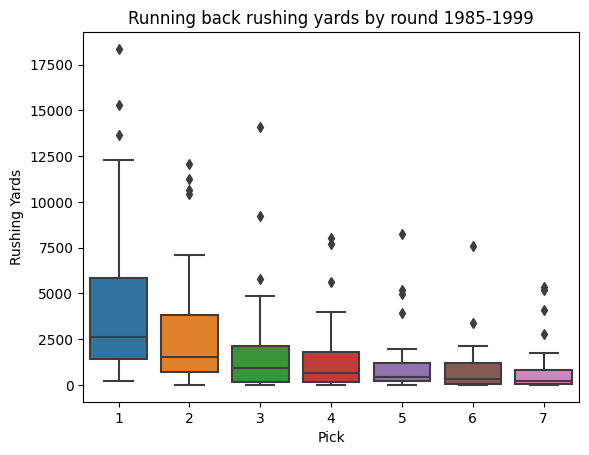

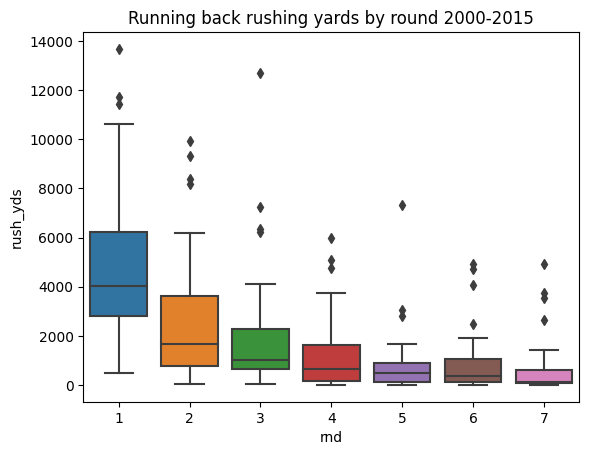

In [195]:
sns.boxplot(before_df, x="rnd", y="rush_yds")
plt.xlabel("Pick")
plt.ylabel("Rushing Yards")
plt.title(f"Running back rushing yards by round 1985-1999")
plt.show()
sns.boxplot(after_df, x="rnd", y="rush_yds")
plt.title(f"Running back rushing yards by round 2000-2015")
plt.show()


The average NFL career is about 3.3 years(which is about 53 games im going to reduce this to 45 as players typically miss about 15% of games in their careers) i am going to see the odds a player taken in each round lasts longer than 3.3 years as well as the odds of taking a RB that makes atleast 1 all pro team

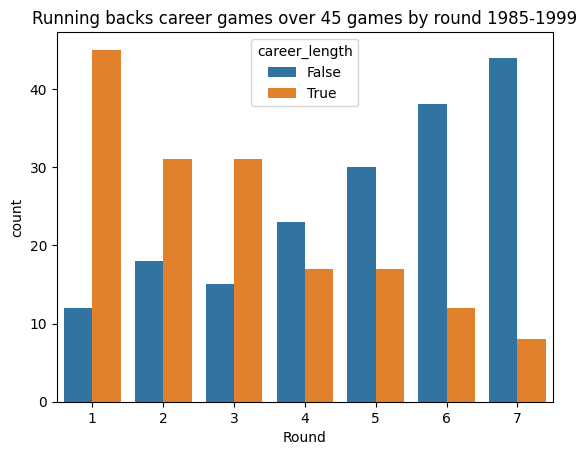

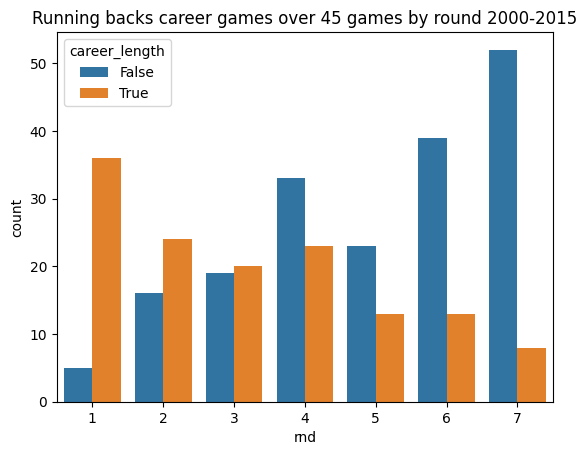

In [196]:
sns.countplot(before_df, x="rnd", hue='career_length')

plt.title("Running backs career games over 45 games by round 1985-1999")
plt.xlabel("Round")
plt.show()

sns.countplot(after_df, x="rnd", hue='career_length')

plt.title("Running backs career games over 45 games by round 2000-2015")
plt.show()

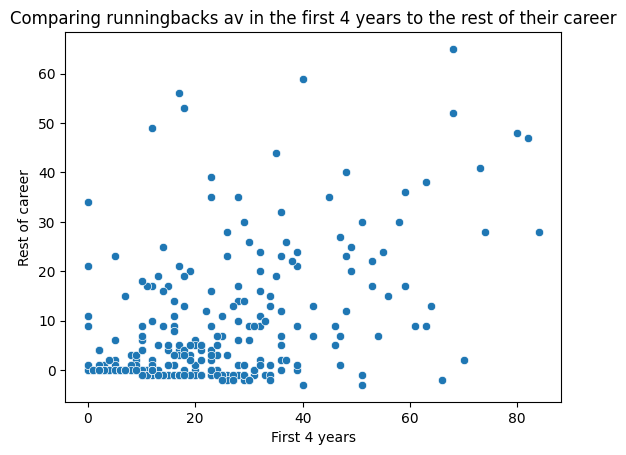

In [207]:
data = rb_df[rb_df["career_length"] == 1]

sns.scatterplot(data, x="first4av", y="restav")

plt.title("Comparing runningbacks av in the first 4 years to the rest of their career")
plt.xlabel("First 4 years")
plt.ylabel("Rest of career")
plt.show()